<h1><center>CODE 1161: Open Data Project</center></h1>
<h2><center>by Jason Lange</center></h2>


<h3><center><b>My data source:</b></center></h3>
<center><img src="assets/imdb-logo.jpg"></img></center>
<p>IMDB makes 7 Databases available to the public in TSV format:</p>
<ul>
    <li>Titles (title, region, lanuage, etc.)</li>
    <li>Basics (Genre, start/end year, etc.)</li>
    <li>Crew (Directors and writers)</li>
    <li>Episodes (Season and episode number)</li>
    <li>Principals (Main cast and crew)</li>
    <li>Ratings (Average and number of votes total)</li>
    <li>People (Names, birthdays, etc.)</li>
</ul>

<h3><center>Using IMDB data to explore the question:</center></h3>
<h1><center>What happened to...</center></h1>
<center><img src="assets/simpsons-logo.png"></img></center>


In [121]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [126]:
# Get simpsons-only exported imdb data
# The imdb episodes data is 128mb!
# This file is 23kb

df_simpsons_eps = pd.read_csv('data/imdb_simpsons_eps.csv')

df_simpsons_eps.head()

,Unnamed: 0,tconst,parentTconst,seasonNumber,episodeNumber
0,3059,tt0177842,tt0096697,7,6
1,6797,tt0348034,tt0096697,1,1
2,208913,tt0701040,tt0096697,5,10
3,208914,tt0701041,tt0096697,6,22
4,208915,tt0701042,tt0096697,14,16


In [3]:
# Get the imdb ratings for everything ever (it's big, this should only be used once and I should then be checking to see if the data I need has been stored elsewhere)
df_imdb_ratings = pd.read_csv('data/imdb_ratings.tsv',  delimiter='\t')

In [4]:

# Function to get episode ratings
def get_episode_rating(episode_id):

    # Use .loc to find the episode with the current loop's episode_id
    episode_data = df_imdb_ratings.loc[df_imdb_ratings['tconst'] == episode_id]
    
    # return episode_data
    episode_rating = episode_data.loc[episode_data.index[0], 'averageRating']
    
    # print(episode_rating)
    return(episode_rating)

# Empty episode ratings list, I'll use this later to assign 
episode_ratings = []

# For each row in df_simpsons_eps df
for index, row in df_simpsons_eps.iterrows():

    # Get the episode ID of this row from tconst
    episode_id = row['tconst']

    # Use this id to get the episode's rating
    episode_rating = get_episode_rating(episode_id)
    
    # Make a list from this data
    episode_ratings.append(episode_rating)




In [5]:
# Add the ratings to the simpsons episodes dataframe
df_simpsons_rated = df_simpsons_eps.assign(imdbRating=episode_ratings)
df_simpsons_rated


,Unnamed: 0,tconst,parentTconst,seasonNumber,episodeNumber,imdbRating
0,3059,tt0177842,tt0096697,7,6,8.6
1,6797,tt0348034,tt0096697,1,1,8.2
2,208913,tt0701040,tt0096697,5,10,8.6
3,208914,tt0701041,tt0096697,6,22,8.2
4,208915,tt0701042,tt0096697,14,16,7.1
...,...,...,...,...,...,...
678,4593442,tt8733702,tt0096697,30,17,6.3
679,4593444,tt8733706,tt0096697,30,18,4.5
680,4593445,tt8733708,tt0096697,30,19,6.2
681,4593447,tt8733716,tt0096697,30,20,5.2


In [6]:
# Sort the values by season number then episode number
df_simpsons_sorted = df_simpsons_rated.sort_values(by=['seasonNumber', 'episodeNumber'])

,Unnamed: 0,tconst,parentTconst,seasonNumber,episodeNumber,imdbRating
1,6797,tt0348034,tt0096697,1,1,8.2
261,263382,tt0756593,tt0096697,1,2,7.7
86,208997,tt0701124,tt0096697,1,3,7.4
260,263210,tt0756399,tt0096697,1,4,7.7
21,208932,tt0701059,tt0096697,1,5,8.0
...,...,...,...,...,...,...
431,1309599,tt11873248,tt0096697,31,18,6.3
434,1355085,tt11969864,tt0096697,31,19,6.0
435,1355107,tt11969902,tt0096697,31,20,5.8
436,1355114,tt11969914,tt0096697,31,21,6.7


In [127]:
df_simpsons_sorted

,Unnamed: 0,tconst,parentTconst,seasonNumber,episodeNumber,imdbRating
1,6797,tt0348034,tt0096697,1,1,8.2
261,263382,tt0756593,tt0096697,1,2,7.7
86,208997,tt0701124,tt0096697,1,3,7.4
260,263210,tt0756399,tt0096697,1,4,7.7
21,208932,tt0701059,tt0096697,1,5,8.0
...,...,...,...,...,...,...
431,1309599,tt11873248,tt0096697,31,18,6.3
434,1355085,tt11969864,tt0096697,31,19,6.0
435,1355107,tt11969902,tt0096697,31,20,5.8
436,1355114,tt11969914,tt0096697,31,21,6.7


## Exploring The Data: Simple Beginnings
Now that I have all of The Simpsons episodes, with ratings, sorted by their order of airing - I want to start by getting a simple visual representation of their ratings over time. I can do that by plotting the x as the episode number, since they were aired sequentially over time, and the ratings as y. I want to see if there's a point where, according to the IMDB ratings data at least, there's a noticable drop in quality.

For now, I'm going to change the episode numbering from from seasonal to continous - since I don't really know if seasons are that important.

## Exploring The Data: Simple Beginnings
<b>Question #1: Is there a point where it all went wrong?</b>

Let's start by getting a simple visual representation of the episode ratings over time - let's see if there's a point where, according to the IMDB ratings data at least, there's a noticable drop in quality.

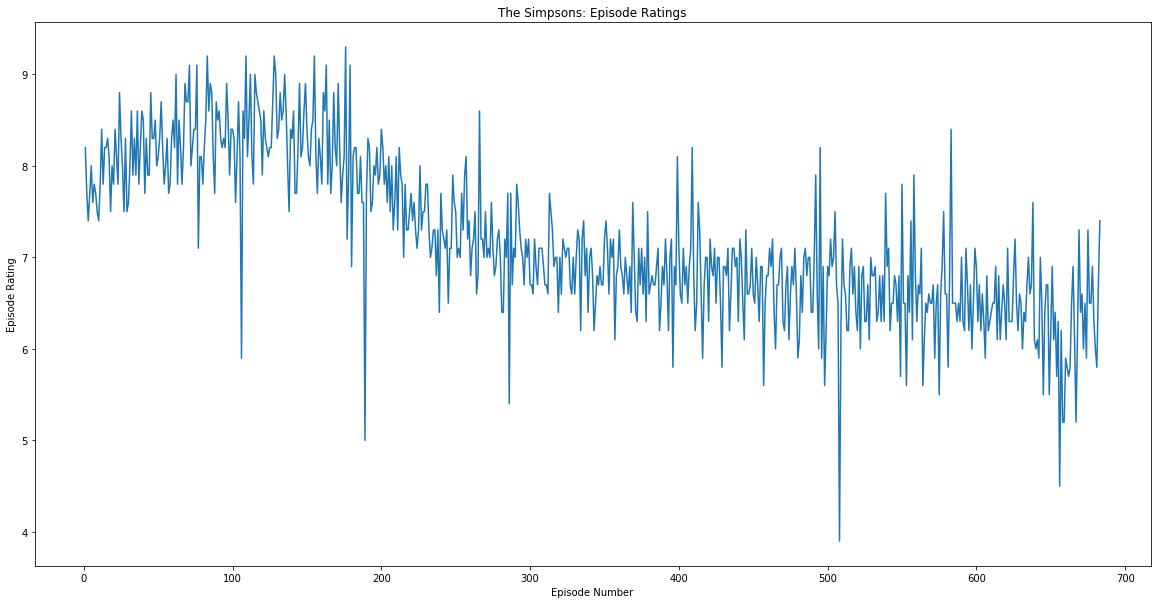

In [128]:
# Episodes as x_data
episode_nums = df_simpsons_sorted['episodeNumber'].tolist()

# Turn the episode numbers, which are based on their season, into a continuous sequence
x_data = []
for i in range(0, len(episode_nums)):
    x_data.append(i + 1)

# Ratings as y_data
y_data = df_simpsons_sorted['imdbRating'].tolist()

plt.plot(x_data, y_data)
plt.xlabel('Episode Number')
plt.ylabel('Episode Rating')
plt.title('The Simpsons: Episode Ratings')
plt.gcf().set_size_inches((20, 10))
plt.show()


<center><img src="assets/graph-01.png"></img></center>
<br>
<b>Like A Cliff:</b> There's a clear dropoff which is then followed by an easing slope. We need to explore the dropoff a little bit more. Let's take a closer look at the first 300 episodes.

(6, 9.72024834437086)

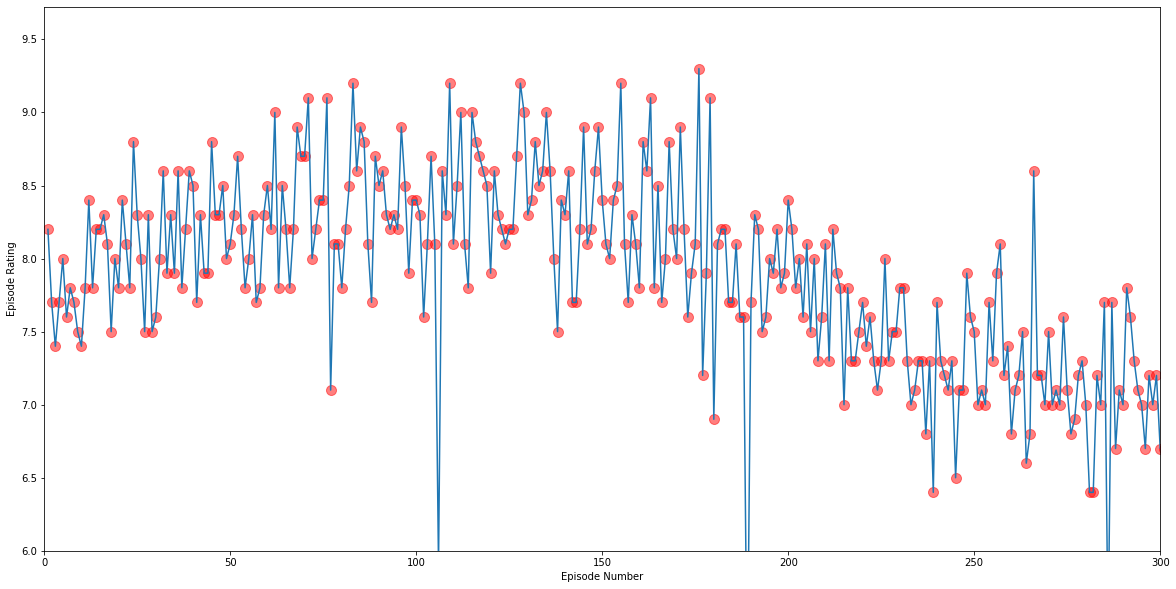

In [8]:
plt.plot(x_data, y_data)
plt.scatter(x_data, y_data, marker='o', c='r', s=100, alpha=0.5)
plt.xlabel('Episode Number')
plt.ylabel('Episode Rating')
plt.gcf().set_size_inches((20, 10))
axes = plt.gca()
axes.set_xlim([0,300])
axes.set_ylim([6,None])

<h2> Hmm... </h2> 
Having watched the simpsons, I'm not too interested in episodes that have a super low rating (6 or below) in the first 300 episodes. I'm going to guess they're "clip shows" or something like that. So I don't want to see anything in the Y axis below 6 at the moment - it compresses the data too much.

In any case, we can see a clear dropoff. Around episode 180, it looks like. Now, the question is - what happened?

Perhaps, more importantly, can the IMDB data answer the question?

IMBD's publicly available data is limited. Let's do what we can with what we have. I feel like there's a few clear contributors to the quality of an episode of the Simpsons: the writers and the directors. Let's look at the writers first.

<center><h2>Question #2: What happened?</h2></center>

Can more IMDB data answer the question?

IMBD's publicly available data is limited. Let's do what we can with what we have. I feel like there's a few clear contributors to the quality of an episode of the Simpsons: the writers and the directors. Let's look at the writers first.

In [9]:
# Import the IMDB crew data
df_imdb_crew = pd.read_csv('data/imdb_crew.tsv',  delimiter='\t')
df_imdb_crew.head(5)

,tconst,directors,writers
0,tt0000001,nm0005690,\N
1,tt0000002,nm0721526,\N
2,tt0000003,nm0721526,\N
3,tt0000004,nm0721526,\N
4,tt0000005,nm0005690,\N


In [10]:
# Data appears like:
# tt0701043	nm0456658	nm0004981,nm0000985,nm0800376,nm0058539,nm0337286
# We need to separate out the CSVs?

def get_episode_writers(episode_id):

    # Use .loc to find the episode with the current loop's episode_id
    crew_data = df_imdb_crew.loc[df_imdb_crew['tconst'] == episode_id]
    
    # Return episode_writers
    # Use .split() to separate the values into a list
    episode_writers = crew_data.loc[crew_data.index[0], 'writers'].split(',')
    return(episode_writers)

episode_writers_list = []

# Use df_simpsons_sorted
for index, row in df_simpsons_sorted.iterrows():

    # Get the episode ID of this row from tconst
    episode_id = row['tconst']

    # Use this id to get the episode's writers
    # Returns as a list
    episode_writers = get_episode_writers(episode_id)

    # Append to the list of lists of writers
    episode_writers_list.append(episode_writers)

# print(episode_writers_list)


<center><h2> Culling The Writers </h2></center>

There's a few writers who consistently appear in the credits for almost all of the simpsons episodes. IMDB's website lists these writers as "developed by" or "created by" (in the case of Matt Groening), but the database simply includes them as writers. So I'm going to cull them from my dataframe.

The writers I'm culling are:
- Matt Groening (creator/developer): nm0004981
- James L. Brooks (developer): nm0000985
- Sam Simon (developer): nm0800376

Now, let's take a look at our new data.


In [11]:
# List of writers to cull
writers_to_cull = ['nm0004981', 'nm0000985', 'nm0800376']

# Create a new list of culled writers
culled_writers_list = []
for i in range (len(episode_writers_list)):
    # List comprehension method
    culled_writers = [x for x in episode_writers_list[i] if x not in writers_to_cull]
    # New list
    culled_writers_list.append(culled_writers)

In [12]:
# Add sequential episode numbers (we'll use this later)
# Episode number list to append as a column
episode_number_list = []
# Start at 0, the first loop will record at 1
episode_number = 0
# Loop over each column until we've got our episodes all numbered
for index, row in df_simpsons_sorted.iterrows():
    episode_number += 1
    episode_number_list.append(episode_number)

# Assign the list to the simpsons episodes dataframe
df_simpsons_sequential = df_simpsons_sorted.assign(seqEpisodeNumber=episode_number_list)
df_simpsons_sequential.head(5)

,Unnamed: 0,tconst,parentTconst,seasonNumber,episodeNumber,imdbRating,seqEpisodeNumber
1,6797,tt0348034,tt0096697,1,1,8.2,1
261,263382,tt0756593,tt0096697,1,2,7.7,2
86,208997,tt0701124,tt0096697,1,3,7.4,3
260,263210,tt0756399,tt0096697,1,4,7.7,4
21,208932,tt0701059,tt0096697,1,5,8.0,5


In [13]:
# Add the culled writers to the simpsons episodes dataframe
df_simpsons_culled = df_simpsons_sequential.assign(imdbWriters=culled_writers_list)
df_simpsons_culled.head(5)

,Unnamed: 0,tconst,parentTconst,seasonNumber,episodeNumber,imdbRating,seqEpisodeNumber,imdbWriters
1,6797,tt0348034,tt0096697,1,1,8.2,1,[nm0690347]
261,263382,tt0756593,tt0096697,1,2,7.7,2,[nm0900140]
86,208997,tt0701124,tt0096697,1,3,7.4,3,"[nm0463124, nm0938645, nm0900140]"
260,263210,tt0756399,tt0096697,1,4,7.7,4,"[nm0419830, nm0718514, nm0900140]"
21,208932,tt0701059,tt0096697,1,5,8.0,5,"[nm0841990, nm0900140]"


<center><h2>Taking A Closer Look</h2></center>
Let's take a look at the average rating for each writer and find out if there's a noticable difference between any of them. It'll be interesting to see, as well, how many episodes the writers contributed to. 

First, we need to build a dictionary/dataframe with our writers data. We'll start by getting all of their episode ratings.


In [14]:
# Perform this operation for each episode
# Get an episode using iterrows(), use imdbWriters data
# Now that we have the writers for an episode, we can start creating a new dictionary as below:
# So we assign a unique_id for the writer to the dictionary parent Key
# Then we have a child dictionary for this key, which stores all the data


def get_episode_writers(episode_id):

    # Use .loc to find the episode with the current loop's episode_id
    crew_data = df_imdb_crew.loc[df_imdb_crew['tconst'] == episode_id]
    
    # Return episode_writers
    # Use .split() to separate the values into a list
    episode_writers = crew_data.loc[crew_data.index[0], 'writers'].split(',')
    return(episode_writers)

episode_writers_list = []

# Use df_simpsons_sorted

# Create a dictionary for the writer's data

writers_dict = {}
writers_dict.clear()

for index, row in df_simpsons_culled.iterrows():

    # Get the writers of this row
    writer_ids = row['imdbWriters']

    # Get the episode rating from this row
    episode_rating = row['imdbRating']

    # For each of the writer_id in the row imbdWriters (which is now a list stored in writer_ids)
    for writer_id in writer_ids:

        # use .setdefault to add data to our empty dictionary
        writers_dict.setdefault(writer_id, {'simpsons_ratings' : []})

        # In writers_dict -> writer_id dictionary
        # For the value of the 'simsons_ratings' key
        # Append episode_rating to the value (a list)
        writers_dict[writer_id]['simpsons_ratings'] += [episode_rating]

# pprint.pprint(writers_dict)
writers_dict


{'nm0690347': {'simpsons_ratings': [8.2]},
 'nm0900140': {'simpsons_ratings': [7.7,
   7.4,
   7.7,
   8.0,
   7.6,
   7.8,
   7.7,
   7.5,
   7.4,
   7.8,
   8.4,
   7.8,
   8.2,
   7.5,
   8.6,
   8.2,
   8.3,
   8.5,
   8.3,
   8.3,
   8.5,
   8.9,
   8.2,
   7.1,
   9.2,
   5.9,
   8.4,
   7.5,
   6.4,
   7.7,
   7.1,
   6.6,
   7.3,
   7.1]},
 'nm0463124': {'simpsons_ratings': [7.4,
   8.4,
   8.3,
   8.4,
   7.6,
   7.7,
   8.0,
   7.8,
   8.5,
   9.1]},
 'nm0938645': {'simpsons_ratings': [7.4,
   8.4,
   8.3,
   8.4,
   7.6,
   7.7,
   8.0,
   7.8,
   8.5,
   9.1]},
 'nm0419830': {'simpsons_ratings': [7.7,
   7.6,
   7.7,
   8.3,
   8.6,
   8.3,
   7.9,
   8.5,
   8.2,
   7.7,
   8.1,
   7.6,
   7.5,
   7.3,
   8.1,
   7.1,
   7.2,
   6.7,
   6.6,
   6.8,
   6.6,
   6.7,
   6.5]},
 'nm0718514': {'simpsons_ratings': [7.7,
   7.6,
   7.7,
   8.3,
   8.6,
   8.3,
   7.9,
   8.5,
   8.2,
   7.7]},
 'nm0841990': {'simpsons_ratings': [8.0,
   7.8,
   7.5,
   7.8,
   8.3,
   8.1,
   8.

Next we'll add an average rating for each writer.

In [15]:
# Loop 
for writer_id in writers_dict.keys():

    # Get the list of ratings for the current loop's writer
    ratings_list = writers_dict[writer_id].get('simpsons_ratings', 0)

    # Divide the ratings by the number of episodes, round it to one decimal point 
    ratings_sum = round(sum(ratings_list) / len(ratings_list), 1)

    # Add the key/value to the writer's dictionary
    writers_dict[writer_id]['simpsons_rating_avg'] = ratings_sum

import pprint
pprint.pprint(writers_dict)


{'nm0000590': {'simpsons_rating_avg': 8.3, 'simpsons_ratings': [8.3]},
 'nm0004813': {'simpsons_rating_avg': 6.2, 'simpsons_ratings': [6.2]},
 'nm0005277': {'simpsons_rating_avg': 8.7,
               'simpsons_ratings': [8.2, 9.1, 8.6, 8.8]},
 'nm0027214': {'simpsons_rating_avg': 6.4, 'simpsons_ratings': [6.4]},
 'nm0031976': {'simpsons_rating_avg': 7.1, 'simpsons_ratings': [7.1]},
 'nm0032219': {'simpsons_rating_avg': 8.3,
               'simpsons_ratings': [5.9,
                                    8.6,
                                    8.3,
                                    9.2,
                                    8.1,
                                    8.5,
                                    9.0,
                                    8.1,
                                    7.8,
                                    9.0,
                                    8.8,
                                    8.7,
                                    8.6,
                                    8.5

## Actually, dictionaries are probably a bad idea.

On second thought, I don't think it's a good idea to store the data for the writers in a dictionary. I'm  not sure why I ever thought it was. In any case, let's make it a database.

In [16]:
# unpacked_dict = [*new_dict]
writers_list = [*writers_dict]

# Empty list for the average ratings
avg_rating_list = []

ratings_list = []

# Create an average ratings list parallel to the writers ID's
for writer_id in writers_list:

    # Get the average rating for this writer_id
    avg_rating = writers_dict[writer_id].get('simpsons_rating_avg', 0)
    
    # Append it to our list
    avg_rating_list.append(avg_rating)

    # Get the average rating for this writer_id
    ratings = writers_dict[writer_id].get('simpsons_ratings', 0)
    
    # Append it to our list
    ratings_list.append(ratings)
    
    
# Build a new database using the two lists
df_simpsons_writers = pd.DataFrame(list(zip(writers_list, ratings_list, avg_rating_list)), columns =['writerID', 'ratings', 'avgRating'])

df_simpsons_writers


,writerID,ratings,avgRating
0,nm0690347,[8.2],8.2
1,nm0900140,"[7.7, 7.4, 7.7, 8.0, 7.6, 7.8, 7.7, 7.5, 7.4, ...",7.8
2,nm0463124,"[7.4, 8.4, 8.3, 8.4, 7.6, 7.7, 8.0, 7.8, 8.5, ...",8.1
3,nm0938645,"[7.4, 8.4, 8.3, 8.4, 7.6, 7.7, 8.0, 7.8, 8.5, ...",8.1
4,nm0419830,"[7.7, 7.6, 7.7, 8.3, 8.6, 8.3, 7.9, 8.5, 8.2, ...",7.5
...,...,...,...
144,nm0004813,[6.2],6.2
145,nm0552500,[5.2],5.2
146,nm10240205,[6.1],6.1
147,nm2463299,[6.0],6.0


<h2> Let's build our writers database. I think we need: </h2>

writerID | realName | episodeRatings | avgRating | startEpisode | endEpisode

In [17]:
# Import the imdb people dataframe
df_imdb_people = pd.read_csv('data/imdb_people.tsv',  delimiter='\t')
df_imdb_people.head(5)

,nconst,primaryName,birthYear,deathYear,primaryProfession,knownForTitles
0,nm0000001,Fred Astaire,1899,1987,"soundtrack,actor,miscellaneous","tt0072308,tt0031983,tt0050419,tt0053137"
1,nm0000002,Lauren Bacall,1924,2014,"actress,soundtrack","tt0038355,tt0071877,tt0117057,tt0037382"
2,nm0000003,Brigitte Bardot,1934,\N,"actress,soundtrack,music_department","tt0049189,tt0054452,tt0059956,tt0057345"
3,nm0000004,John Belushi,1949,1982,"actor,soundtrack,writer","tt0078723,tt0080455,tt0072562,tt0077975"
4,nm0000005,Ingmar Bergman,1918,2007,"writer,director,actor","tt0083922,tt0050986,tt0060827,tt0050976"


In [18]:
# A function to find writer data in df_imdb_people
def get_writer_data(writer_id, writer_col):

    # Use .loc to find the episode with the current loop's episode_id
    writer_row_data = df_imdb_people.loc[df_imdb_people['nconst'] == writer_id]

    # Get the specific cell data based on the writer_col
    writer_data = writer_row_data.loc[writer_row_data.index[0], writer_col]

    return writer_data

writer_names_list = []

# Iterate through each row of our new writer DF
for index, row in df_simpsons_writers.iterrows():
    # Find our current writer ID, use this for our data finder function
    writer_id = row['writerID']
    # Tell the function what name we're gonna use
    writer_col = 'primaryName'
    # Get the data
    writer_name = get_writer_data(writer_id, writer_col)
    # Write our data to a list
    writer_names_list.append(writer_name)

# print(writer_names_list)

In [19]:
# Assign the list to a new column in our dataframe

# I'm not sure if this is the way to go, but in order to preserve our prior DF incase anything goes wrong, we're going to copy the DF to a new one
df_simpsons_writers_01 = df_simpsons_writers.copy()

# Now let's add our new list of names (after the writerID)
df_simpsons_writers_01.insert(1, 'writerName', writer_names_list)

df_simpsons_writers_01

,writerID,writerName,ratings,avgRating
0,nm0690347,Mimi Pond,[8.2],8.2
1,nm0900140,Jon Vitti,"[7.7, 7.4, 7.7, 8.0, 7.6, 7.8, 7.7, 7.5, 7.4, ...",7.8
2,nm0463124,Jay Kogen,"[7.4, 8.4, 8.3, 8.4, 7.6, 7.7, 8.0, 7.8, 8.5, ...",8.1
3,nm0938645,Wallace Wolodarsky,"[7.4, 8.4, 8.3, 8.4, 7.6, 7.7, 8.0, 7.8, 8.5, ...",8.1
4,nm0419830,Al Jean,"[7.7, 7.6, 7.7, 8.3, 8.6, 8.3, 7.9, 8.5, 8.2, ...",7.5
...,...,...,...,...
144,nm0004813,Nancy Cartwright,[6.2],6.2
145,nm0552500,Jenna Martin,[5.2],5.2
146,nm10240205,Max Cohn,[6.1],6.1
147,nm2463299,Elisabeth Kiernan Averick,[6.0],6.0


In [20]:
# Copy our DF again
df_simpsons_writers_02 = df_simpsons_writers_01.copy()
# Sort the new DF by avgRating for our graph
df_simpsons_writers_02.sort_values(by=['avgRating'], ascending=False, inplace=True)
# Output
df_simpsons_writers_02

,writerID,writerName,ratings,avgRating
17,nm0169712,Robert Cohen,[8.8],8.8
49,nm0950085,Steve Young,[8.8],8.8
29,nm0569775,Dan McGrath,"[8.8, 8.7, 8.7, 9.2]",8.8
13,nm0780051,Nell Scovell,[8.8],8.8
23,nm0140583,Michael Carrington,[8.7],8.7
...,...,...,...,...
120,nm0381116,Don Hertzfeldt,[5.6],5.6
122,nm2094206,Neil Campbell,[5.6],5.6
139,nm9457704,Robin Sayers,[5.5],5.5
143,nm1689290,Megan Amram,"[4.5, 5.8]",5.2


In [129]:
df_simpsons_writers_02

,writerID,writerName,ratings,avgRating
17,nm0169712,Robert Cohen,[8.8],8.8
49,nm0950085,Steve Young,[8.8],8.8
29,nm0569775,Dan McGrath,"[8.8, 8.7, 8.7, 9.2]",8.8
13,nm0780051,Nell Scovell,[8.8],8.8
23,nm0140583,Michael Carrington,[8.7],8.7
...,...,...,...,...
120,nm0381116,Don Hertzfeldt,[5.6],5.6
122,nm2094206,Neil Campbell,[5.6],5.6
139,nm9457704,Robin Sayers,[5.5],5.5
143,nm1689290,Megan Amram,"[4.5, 5.8]",5.2


Now that we have some writer data, let's plot some more graphs.

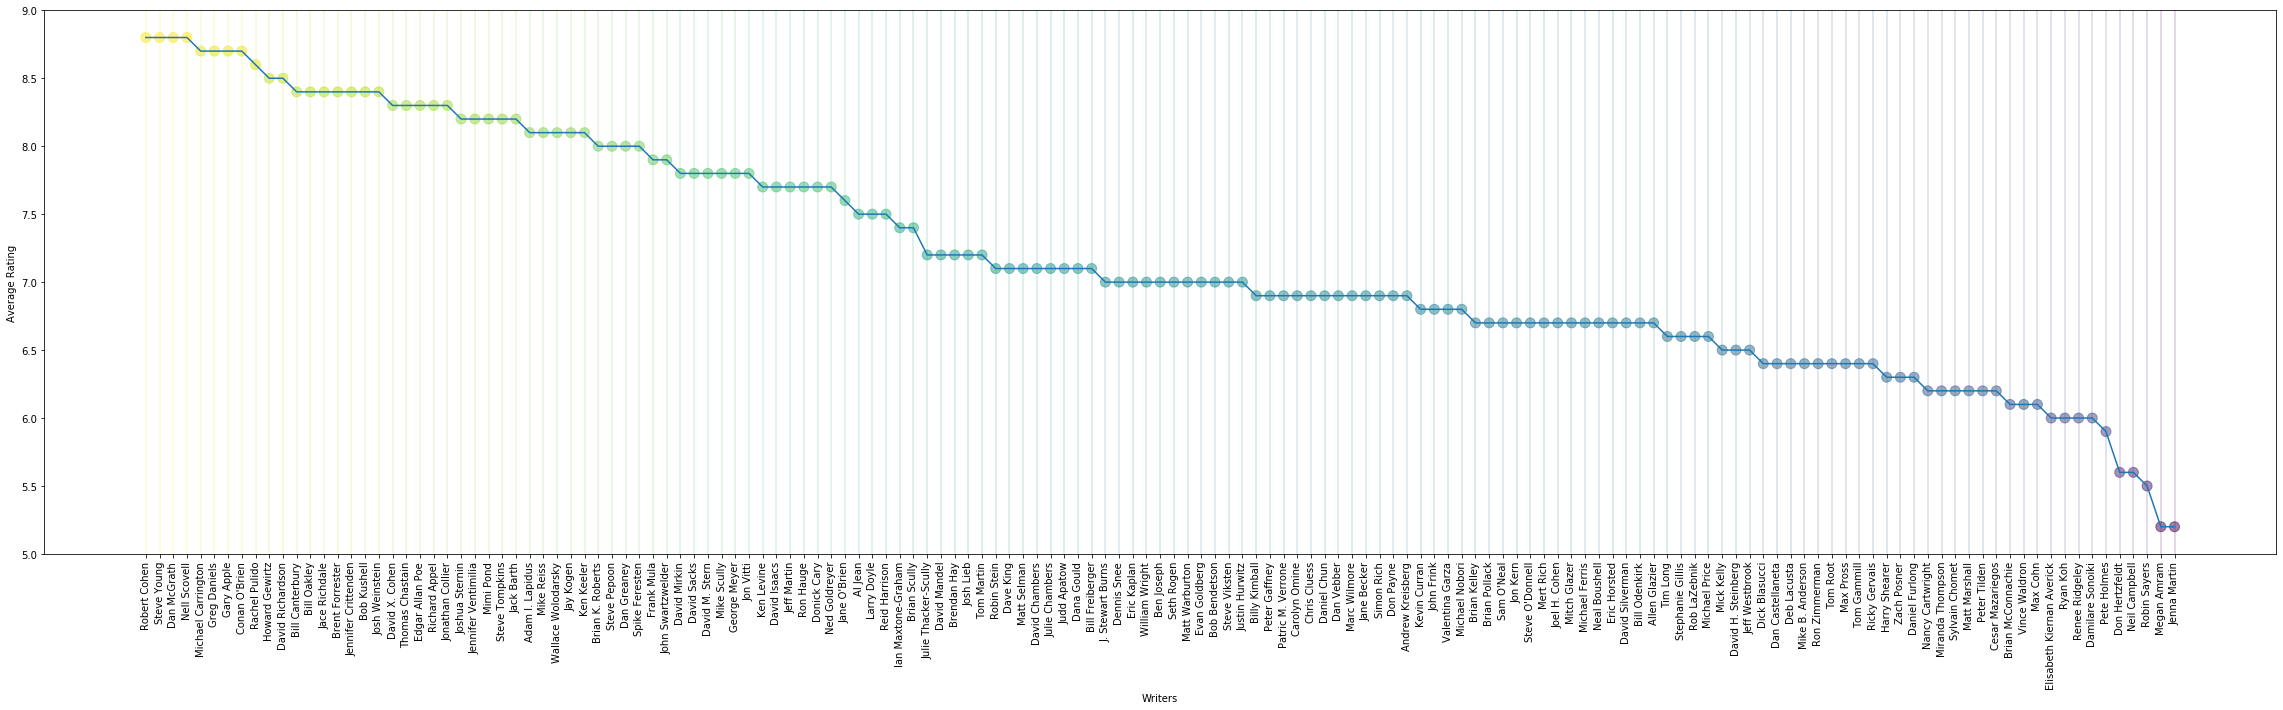

In [44]:
# Data
x_data = df_simpsons_writers_02['writerName'].tolist()
y_data = df_simpsons_writers_02['avgRating'].tolist()
# Use the ratings to set a size
sizes = [i ** 4 for i in y_data]
# Use a colour map
color_map = plt.cm.get_cmap('viridis')
# Plot circles
plt.scatter(x_data, y_data, c=y_data, cmap=color_map, marker='o', s=100, alpha=0.5)
# Plot vertical lines
plt.scatter(x_data, y_data, c=y_data, cmap=color_map, marker='|', s=10000000, alpha=0.2)
# Plot trendline
plt.plot(x_data, y_data)
# Labels
plt.xticks(rotation=90)
plt.xlabel('Writers')
plt.ylabel('Average Rating')
# Sizing
plt.gcf().set_size_inches((40, 10))
plt.ylim(5, 9)
plt.show()

<center><img src="assets/graph-02.png"></img></center>
<br>

<b>A huge variance</b>: There's a massive difference between writer ratings and, frankly, a strangely linear spread from best to worst writers. There's definitely more we can get out of this data.

First, we need to add more to our writer database. Let's start by adding things like their on-show experience (number of simpsons episodes written), as well as their first appearance (and their last).

In [133]:
# For each writer's ID
# Find which episodes he's written in df_simpsons_culled
# use the standard iterrows() so for each row of a writer, get their ID
# if it exists, assign the 'tconst' (episode name) to their list
# so if 


# A function to find writer data in df_imdb_people
def get_writer_episodes(writer_id, writer_col):

    # Use .loc to find the episode with the current loop's episode_id
    writer_row_data = df_imdb_people.loc[df_imdb_people['nconst'] == writer_id]

    # Get the specific cell data based on the writer_col
    writer_data = writer_row_data.loc[writer_row_data.index[0], writer_col]

    return writer_data

writer_episodes_list = []

# Iterate through each row of our new writer DF
for index, row in df_simpsons_writers_02.iterrows():
    # Find our current writer ID, use this for our data finder function
    writer_id = row['writerID']
    # Tell the function what name we're gonna use
    writer_col = 'primaryName'
    # Get the data
    writer_episodes = get_writer_episodes(writer_id, writer_col)
    # Write our data to a list
    writer_episodes_list.append(writer_episodes)

# print(writer_names_list)

In [23]:
df_simpsons_culled

,Unnamed: 0,tconst,parentTconst,seasonNumber,episodeNumber,imdbRating,seqEpisodeNumber,imdbWriters
1,6797,tt0348034,tt0096697,1,1,8.2,1,[nm0690347]
261,263382,tt0756593,tt0096697,1,2,7.7,2,[nm0900140]
86,208997,tt0701124,tt0096697,1,3,7.4,3,"[nm0463124, nm0938645, nm0900140]"
260,263210,tt0756399,tt0096697,1,4,7.7,4,"[nm0419830, nm0718514, nm0900140]"
21,208932,tt0701059,tt0096697,1,5,8.0,5,"[nm0841990, nm0900140]"
...,...,...,...,...,...,...,...,...
431,1309599,tt11873248,tt0096697,31,18,6.3,679,"[nm0303991, nm0698795, nm6746898, nm2402974]"
434,1355085,tt11969864,tt0096697,31,19,6.0,680,"[nm2803399, nm2402974]"
435,1355107,tt11969902,tt0096697,31,20,5.8,681,"[nm2803399, nm2402974]"
436,1355114,tt11969914,tt0096697,31,21,6.7,682,"[nm1121389, nm2402974]"


In [134]:
# A function for getting writer data
def get_writer_data(writer_id, col_name):
    current_writer = writer_id
    writer_data = []

    # For each row in df_simpsons_culled
    for index, row in df_simpsons_culled.iterrows():

        # Store the value stored in the imdbWriters column (the list of writers)
        writers_list = df_simpsons_culled.loc[df_simpsons_culled.index[index], 'imdbWriters']

        # Does writers_list contain our current_writer?
        if current_writer in writers_list:
            # If it does, get the data
            episode_data = df_simpsons_culled.loc[df_simpsons_culled.index[index], col_name]
            # And then append the data to our list
            writer_data.append(episode_data)

    return(writer_data)

# A function for making a list of data
def make_writer_data_list(col_name):
    # Iterrate through the df_simpsons_writers_02
    writer_data_list = []
    for index, row in df_simpsons_writers_02.iterrows():
        # Store the writer ID
        writer_id = row['writerID']
        # Parse the writer ID into our get_writer_episodes function
        writer_data = get_writer_data(writer_id, col_name)
        # Each loop returns a new list, so we write that list to a new list
        writer_data_list.append(writer_data)

    return writer_data_list

# Create a list of writer episode IDs
writer_episodes_lists = make_writer_data_list('tconst')

# Create a list of sequential writer episode numbers 
writer_episode_numbers_list = make_writer_data_list('seqEpisodeNumber')

In [135]:
# More data
number_of_episodes_list = []
first_episodes_list = []
last_episodes_list = []

for episode_list in writer_episode_numbers_list:
    # How many episodes was each writer involved in?
    number_of_episodes_list.append(len(episode_list))
    # What was their first episode?
    first_episodes_list.append(episode_list[0])
    # What was their last episode?
    last_episodes_list.append(episode_list[-1])

In [136]:
# Assign the lists to new columns in our dataframe

# Continue the (probably terrible) method of copying the database
df_simpsons_writers_03 = df_simpsons_writers_02.copy()

# Add the colums to the end
df_simpsons_writers_03 = df_simpsons_writers_03.assign(
    episodes=writer_episodes_lists, 
    episodeNumbers=writer_episode_numbers_list, 
    numberOfEpisodes=number_of_episodes_list,
    firstEpisode=first_episodes_list,
    lastEpisode=last_episodes_list
    )

In [137]:
df_simpsons_writers_03

,writerID,writerName,ratings,avgRating,episodes,episodeNumbers,numberOfEpisodes,firstEpisode,lastEpisode
17,nm0169712,Robert Cohen,[8.8],8.8,[tt0701098],[45],1,45,45
49,nm0950085,Steve Young,[8.8],8.8,[tt0701131],[161],1,161,161
29,nm0569775,Dan McGrath,"[8.8, 8.7, 8.7, 9.2]",8.8,"[tt0701279, tt0701072, tt0763026, tt0701281]","[86, 89, 104, 109]",4,86,109
13,nm0780051,Nell Scovell,[8.8],8.8,[tt0701195],[24],1,24,24
23,nm0140583,Michael Carrington,[8.7],8.7,[tt0772625],[70],1,70,70
...,...,...,...,...,...,...,...,...,...
120,nm0381116,Don Hertzfeldt,[5.6],5.6,[tt3707816],[553],1,553,553
122,nm2094206,Neil Campbell,[5.6],5.6,[tt3990550],[564],1,564,564
139,nm9457704,Robin Sayers,[5.5],5.5,[tt7702262],[645],1,645,645
143,nm1689290,Megan Amram,"[4.5, 5.8]",5.2,"[tt8733706, tt10198852]","[656, 661]",2,656,661


<h2> Attempting a scatterplot </h2>

I feel like it makes sense, intuitively, that there's a chance we'll something by looking at a scatterplot of the writer data. So...

In [61]:
df_scatter = df_simpsons_writers_03.loc[:, df_simpsons_writers_03.columns.intersection(['avgRating','numberOfEpisodes','writerName'])]

df_scatter

,writerName,avgRating,numberOfEpisodes
17,Robert Cohen,8.8,1
49,Steve Young,8.8,1
29,Dan McGrath,8.8,4
13,Nell Scovell,8.8,1
23,Michael Carrington,8.7,1
...,...,...,...
120,Don Hertzfeldt,5.6,1
122,Neil Campbell,5.6,1
139,Robin Sayers,5.5,1
143,Megan Amram,5.2,2


In [28]:
limited_df_scatter = df_scatter[df_scatter.numberOfEpisodes > 10]
limited_df_scatter.head(4)

,writerName,avgRating,numberOfEpisodes
26,Bill Canterbury,8.4,22
19,Bill Oakley,8.4,13
35,Jennifer Crittenden,8.4,28
20,Josh Weinstein,8.4,13


149


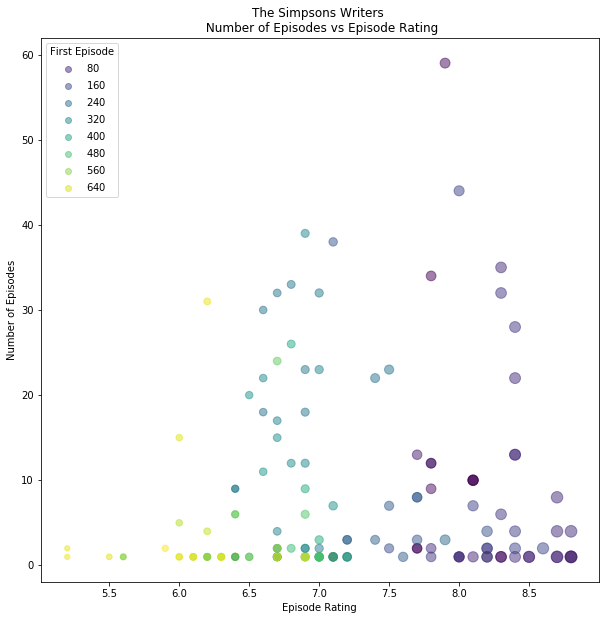

In [82]:
avg_rating_list = df_simpsons_writers_03['avgRating'].tolist()
number_of_episodes_list = df_simpsons_writers_03['numberOfEpisodes'].tolist()
writer_names_list = df_simpsons_writers_03['writerName'].tolist()
first_episode_list = df_simpsons_writers_03['firstEpisode'].tolist()
last_episode_list = df_simpsons_writers_03['lastEpisode'].tolist()
print(len(number_of_episodes_list))

size_list = []
for i in avg_rating_list:
    size = i * i * (i * .2)
    size_list.append(size)

x = avg_rating_list
y = number_of_episodes_list
area = size_list
c = first_episode_list

fig, ax = plt.subplots()
scatter = ax.scatter(x, y, s=area, marker='o', c=c, alpha=0.5, label="Writers")

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="First Episode")


# plt.scatter(x, y, s=area, marker='o', c=c, alpha=0.5, label="Writers")
plt.xlabel('Episode Rating')
plt.ylabel('Number of Episodes')
plt.title('The Simpsons Writers \n Number of Episodes vs Episode Rating')
plt.gcf().set_size_inches((10, 10))
plt.show()

In [139]:
df_simpsons_writers_03

,writerID,writerName,ratings,avgRating,episodes,episodeNumbers,numberOfEpisodes,firstEpisode,lastEpisode
17,nm0169712,Robert Cohen,[8.8],8.8,[tt0701098],[45],1,45,45
49,nm0950085,Steve Young,[8.8],8.8,[tt0701131],[161],1,161,161
29,nm0569775,Dan McGrath,"[8.8, 8.7, 8.7, 9.2]",8.8,"[tt0701279, tt0701072, tt0763026, tt0701281]","[86, 89, 104, 109]",4,86,109
13,nm0780051,Nell Scovell,[8.8],8.8,[tt0701195],[24],1,24,24
23,nm0140583,Michael Carrington,[8.7],8.7,[tt0772625],[70],1,70,70
...,...,...,...,...,...,...,...,...,...
120,nm0381116,Don Hertzfeldt,[5.6],5.6,[tt3707816],[553],1,553,553
122,nm2094206,Neil Campbell,[5.6],5.6,[tt3990550],[564],1,564,564
139,nm9457704,Robin Sayers,[5.5],5.5,[tt7702262],[645],1,645,645
143,nm1689290,Megan Amram,"[4.5, 5.8]",5.2,"[tt8733706, tt10198852]","[656, 661]",2,656,661


<center><img src="assets/graph-03.png"></img></center>
<br>

<b>Looking at the colours</b>, we start to see something potentially insightful: the colours appear somewhat "bunched up" - rather than there being an equal spread. We need to see what's going on here - let's add labels to our scatterplot points.

In [30]:
df_simpsons_mt10 = df_simpsons_writers_03[df_simpsons_writers_03.numberOfEpisodes > 10]


<Figure size 432x288 with 0 Axes>

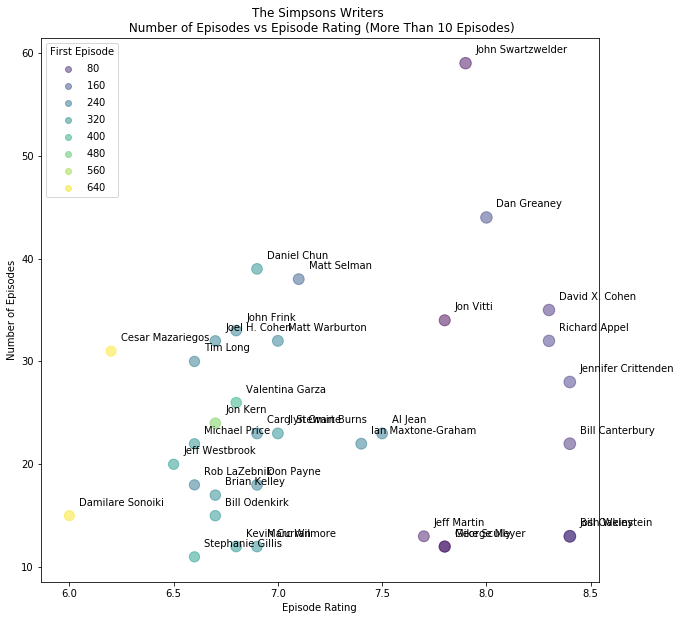

In [93]:
avg_rating_list = df_simpsons_mt10['avgRating'].tolist()
number_of_episodes_list = df_simpsons_mt10['numberOfEpisodes'].tolist()
writer_names_list = df_simpsons_mt10['writerName'].tolist()
first_episode_list = df_simpsons_mt10['firstEpisode'].tolist()
last_episode_list = df_simpsons_mt10['lastEpisode'].tolist()

plt.clf()

# Change the size of the circles a little bit based on the number of eps
size_list = []
for i in avg_rating_list:
    size = i * i * (i * .2)
    size_list.append(size)


# Plot data
xl = avg_rating_list
yl = number_of_episodes_list
zl = writer_names_list
cl = first_episode_list
cl_alt = last_episode_list


# Plot the chart
fig, ax = plt.subplots()
scatter = ax.scatter(xl, yl, c=cl, alpha=0.5, marker='o', s=area)
# plt.scatter(xl, yl, c=cl, alpha=0.5, marker='o', s=area)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="First Episode")


# Zip joins x and y coordinates in pairs
for x,y,z in zip(xl,yl,zl):

    label = "{}".format(z)

    # This method is called for each point
    plt.annotate(label, # Text
                 (x,y), # Point to label
                 textcoords="offset points", # Position the text
                 xytext=(10,10), # Distance from text to points (x,y)
                 ha='left') # Horizontal alignment
plt.xlabel('Episode Rating')
plt.ylabel('Number of Episodes')
plt.title('The Simpsons Writers \n Number of Episodes vs Episode Rating (More Than 10 Episodes)')
plt.gcf().set_size_inches((10, 10))
plt.show()

<center><img src="assets/graph-04.png"></img></center>
<br>

For the sake of clarity, I've removed writers with less than 10 episodes. It seems like something has emerged: there's very little colour shift between purple, turquoise and yellow. It appears that the scatterplot is showing writer <b><i>generations</i></b> of a sort.

## It's in the colours

It's not a particularly surprisingly graph. There's a lot of writers as well, making it hard to see what's going on. I've removed any writers who've contributed less than 10 episodes, just for clarity. We probably want to look at regular contributors, anyway.

Using the writer's *first* episodes as a way to colourise the dots wasn't particularly insightful at first, but looking closer, I found something...

Note the *absence* of yellow dots, as well as the clustering of green/blue and purple dots: we're seeing a sort of generational change here, I think, where you have writers who joined early and wrote consistently great episodes (purple). You then have writers who joined after that in green/blue - the second generation, if you will - wrote episodes that were between 6.5-7.5. Decidedly, consistently... average.

Let's look at the yellow dots again. I count only two: guys who joined late and have written a ton of really poorly rated episodes. Moreover, there are *only* two, and aside from Jon Kern, who joined between the "yellow" and "green/blue" generations - there are no clear writers between these generations.

There *should be* writers between generations - there should be a clear colour shift. Especially with so many writers. They must be hidden in the > 10 group of writers. Let's take a look at them (without labels - you wouldn't be able to read anything, anyway).

I wonder... if there's only 2 writers from the "yellow" generation - the last generation - does that mean there's been a lot of writers who've written few episodes? The Simpsons writers are a team - can't be good to have a lot of contributors who aren't hanging around. Good writing teams rely on stability. So let's take a look at the > 10. 

Oh, and one last thing to note, it seems like, of the "purple" generation, Matt Selman joined towards the latter end (he's pretty blue), but boy, for a guy who wrote like 40 episodes and joined relatively early, he has a poor average. Did he lead the downward slide? We may be able to find out. More on that later.



In [32]:
# DF with all writers with < 10 episodes removed
df_simpsons_lt10 = df_simpsons_writers_03[df_simpsons_writers_03.numberOfEpisodes < 10]

<Figure size 432x288 with 0 Axes>

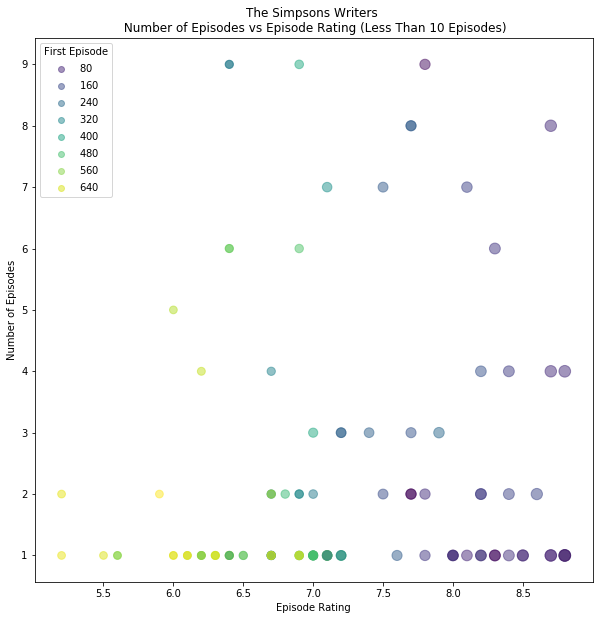

In [86]:
avg_rating_list = df_simpsons_lt10['avgRating'].tolist()
number_of_episodes_list = df_simpsons_lt10['numberOfEpisodes'].tolist()
writer_names_list = df_simpsons_lt10['writerName'].tolist()
first_episode_list = df_simpsons_lt10['firstEpisode'].tolist()
last_episode_list = df_simpsons_lt10['lastEpisode'].tolist()
# plt.figure(dpi=1200)
plt.clf()

# Change the size of the circles a little bit based on the number of eps
size_list = []
for i in avg_rating_list:
    size = i * i * (i * .2)
    size_list.append(size)


# Plot data
xl = avg_rating_list
yl = number_of_episodes_list
zl = writer_names_list
cl = first_episode_list
cl_alt = last_episode_list

# Plot the chart
# plt.scatter(xl, yl, c=cl, alpha=0.5, marker='o', s=area)
fig, ax = plt.subplots()
scatter = ax.scatter(xl, yl, c=cl, alpha=0.5, marker='o', s=area)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper left", title="First Episode")


plt.gcf().set_size_inches((10, 10))
plt.title('The Simpsons Writers \n Number of Episodes vs Episode Rating (Less Than 10 Episodes)')
plt.xlabel('Episode Rating')
plt.ylabel('Number of Episodes')
plt.show()

<center><img src="assets/graph-05.png"></img></center>
<br>

This graph shows that, during the Gen A and Gen C, there were quite a few writers that contributed few (often just one) episodes. Gen B, however, is missing small-number contributors. Did the producers go through phases of staffing methods?

<h2>Writer Generations</h2>

Gen A (red): joined during ep1-180

Gen B (green): joined during eps 181-600

Gen C (blue): joined during eps 601+

<center><img src="assets/graph-06.png"></img></center>

In [34]:
# DF with all writers with < 10 episodes removed AND...
df_lookup = df_simpsons_writers_03
gen_a_end = 180
gen_b_end = 600

# GEN A: episode join date between 1-180
df_simpsons_gen_a = df_lookup[df_lookup.firstEpisode < (gen_a_end + 1)]
# GEN A/B: episodes greater than 180...
df_simpsons_gen_ab = df_lookup[df_lookup.firstEpisode > gen_a_end]
# GEN B: episodes greater than 180 but less than 400
df_simpsons_gen_b = df_simpsons_gen_ab[df_simpsons_gen_ab.firstEpisode < (gen_b_end + 1)]
# GEN C: episodes greater than 400
df_simpsons_gen_c = df_lookup[df_lookup.firstEpisode > gen_b_end]

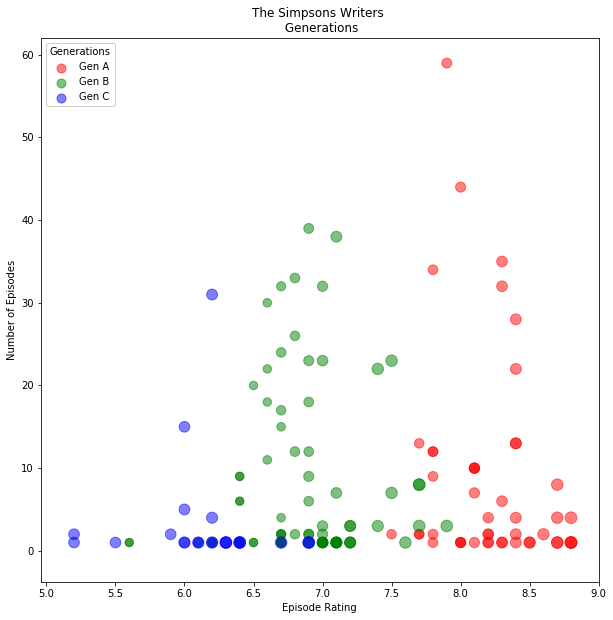

In [107]:
# Todo: write this function better and re-apply it to prior scatterplots

def scatter_plotter(df_inputs, colours, titles, labels):
    colour_index = 0
    for i in df_inputs:
        # Plot data
        xl = i['avgRating'].tolist()
        yl = i['numberOfEpisodes'].tolist()
        zl = i['writerName'].tolist()
        cl = i['firstEpisode'].tolist()
        cl_alt = i['lastEpisode'].tolist()
   
        # Get the generation title
        gen_title = titles[colour_index]
        
        # Get the colour
        plot_colour = colours[colour_index]
        colour_index += 1

        # Plot the chart
        plt.scatter(xl, yl, c=plot_colour, alpha=0.5, marker='o', s=area, label=gen_title)
     
        # Label the chart
        if labels == True:
            # Zip joins x and y coordinates in pairs
            for x,y,z in zip(xl,yl,zl):

                label = "{}".format(z)

                # This method is called for each point
                plt.annotate(label, # Text
                            (x,y), # Point to label
                            textcoords="offset points", # Position the text
                            xytext=(10,10), # Distance from text to points (x,y)
                            ha='left') # Horizontal alignment"""
                
    plt.legend(framealpha=1, frameon=True, loc="upper left", title="Generations")
    plt.title('The Simpsons Writers \n Generations')
    plt.xlabel('Episode Rating')
    plt.ylabel('Number of Episodes')
    plt.gcf().set_size_inches((10, 10))
    plt.show()

    
df_plot_list = [df_simpsons_gen_a, df_simpsons_gen_b, df_simpsons_gen_c]
df_plot_colours = ['r', 'g', 'b']
df_generations = ['Gen A', 'Gen B', 'Gen C']
scatter_plotter(df_plot_list, df_plot_colours, df_generations, False)



<h2>Generational Endings</h2>
The colours of our graphs currently represent when a writer <i>joined</i> the show, and appear to show some clear generational shifts.

But I want to look at when these writers <i>left</i> the show. In order to do this, we plot the same graph but change the colour from when the writers first contributed to when they <i>last</i> contributed.

For clarity, we'll look at the top 10 again.

## Another look
Returning to my thoughts about Matt Selman - an outlier that joined during the higher rated point of the show who, despite writing around 40 episodes, had a noticably low average for his generation - I want to take a look at one other thing before we move on: termination.

The colours of the graph currently represent when a writer joined the show, and appear to show some clear generational shifts if we consider the  relationship between ratings and time as per the first graphs we plotted.

But let's look at when these writers *left* the show. In order to do this, we plot the same graph but change the colour from when the writers first contributed to when they *last* contributed.

For clarity, we'll look at the top 10 again.


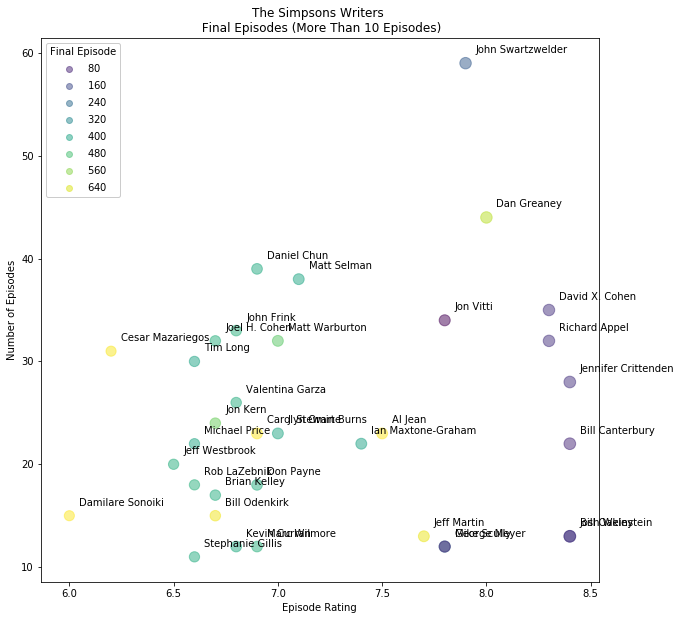

In [109]:
avg_rating_list = df_simpsons_mt10['avgRating'].tolist()
number_of_episodes_list = df_simpsons_mt10['numberOfEpisodes'].tolist()
writer_names_list = df_simpsons_mt10['writerName'].tolist()
first_episode_list = df_simpsons_mt10['firstEpisode'].tolist()
last_episode_list = df_simpsons_mt10['lastEpisode'].tolist()


xl = avg_rating_list
yl = number_of_episodes_list
zl = writer_names_list
cl = first_episode_list
cl_alt = last_episode_list

# Plot the chart
plot = plt.scatter(xl, yl, c=cl_alt, alpha=0.5, marker='o', s=area)

# Zip joins x and y coordinates in pairs
for x,y,z in zip(xl,yl,zl):

    label = "{}".format(z)

    # This method is called for each point
    plt.annotate(label, # Text
                 (x,y), # Point to label
                 textcoords="offset points", # Position the text
                 xytext=(10,10), # Distance from text to points (x,y)
                 ha='left') # Horizontal alignment
    
plt.legend(*plot.legend_elements(), framealpha=1, frameon=True, loc="upper left", title="Final Episode")
plt.title('The Simpsons Writers \n Final Episodes (More Than 10 Episodes)')
plt.xlabel('Episode Rating')
plt.ylabel('Number of Episodes')
plt.gcf().set_size_inches((10, 10))
plt.show()

<center><img src="assets/graph-07.png"></img></center>
<br>

<b>Closing in on an answer to question #2: Was it the writers?</b>

Before we answer that question, it's clear now, I think that there's certainly generations of writers. And while they didn't all come at exactly the same time, based on this graph, they certainly appeared to *leave* at once. But there are some outliers: let's take a closer look at Dan Greaney, Al Jean and Jeff Martin. While their generation left, they stayed.

<center>I also have one more (final) question:<br>
<b>If these early writers are still writing for the show, are they creating the only modern episodes worth watching?<br>
Are they creating <i>diamonds in the rough</i> that I have yet to discover?</b></center>

## Closing in on an answer to the question: Was it the writers?
Dan Greany stands out to me straight away. Here's a guy who's contributed over 40 episodes and has an average of 8.0, but he's contributed up to the latest generation of writers.

What does that mean?

Did Dan Greany write enough episodes with high enough ratings early on so that his more recent episodes didn't affect his ratings (which, if look at the original graphs, we assume *must* be fairly poorly rated - since there aren't really *any* highly rated episodes)?

We can take a look. Maybe Dan just contributed one episode recently and, with its single rating unlikely to affect his average rating, the appearance of a single recent episode is simply throwing off any sort of assertions we can make.

While we're looking at Dan, we ought to look at Al Jean and Jeff Martin as well - both of whom have high ratings (7.5+) but have contributed until late. Let's see what's going on.

Oh, and lastly, there's clearly now, I think evidence of generational changes within the writing staff. I don't even need to see the dates; the colours are clear enough. In fact, it seems like there was a mass-exodus off writers (turquoise) who all contributed between 10-50 episodes at one stage, leading to the third (yellow) generation.

In the latter graph, we saw that the second generation was missing small-number contributors. It seems like, for whatever reason, the second generation of (frankly, average) writers contributed many (more than 10) episodes rather than just a few.

# Outliers
As I just mentioned, let's take a closer look at Dan Greaney, Al Jean and Jeff Martin. They're outliers in that they have high-rating contributions but left during the latter generations.



In [94]:
# Outliers-only
df_simpsons_outliers = df_simpsons_writers_03.loc[
    (df_simpsons_writers_03['writerName'] == 'Dan Greaney') | 
    (df_simpsons_writers_03['writerName'] == 'Al Jean') |
    (df_simpsons_writers_03['writerName'] == 'Jeff Martin')
    ]

df_simpsons_outliers

,writerID,writerName,ratings,avgRating,episodes,episodeNumbers,numberOfEpisodes,firstEpisode,lastEpisode
43,nm0337286,Dan Greaney,"[8.4, 8.8, 8.5, 8.6, 9.0, 8.6, 8.0, 7.5, 8.4, ...",8.0,"[tt0779680, tt0701262, tt0701042, tt0779678, t...","[141, 177, 307, 154, 155, 146, 163, 132, 152, ...",44,141,608
12,nm0552495,Jeff Martin,"[8.0, 8.3, 8.3, 8.3, 8.3, 7.7, 8.2, 7.8, 8.7, ...",7.7,"[tt0768556, tt0701048, tt0701191, tt0701121, t...","[47, 61, 28, 82, 57, 19, 42, 69, 63, 34, 592, ...",13,47,658
4,nm0419830,Al Jean,"[7.7, 7.6, 7.7, 8.3, 8.6, 8.3, 7.9, 8.5, 8.2, ...",7.5,"[tt0701086, tt0701269, tt0701161, tt0701041, t...","[261, 25, 43, 125, 8, 4, 6, 181, 268, 229, 232...",23,261,677


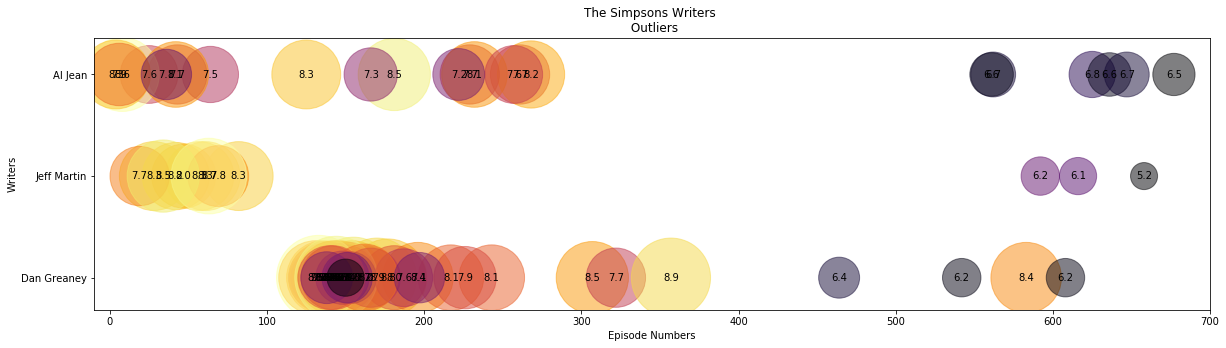

In [116]:
def get_outlier(writer_name):
    df_simpsons_outlier = df_simpsons_writers_03.loc[df_simpsons_writers_03['writerName'] == writer_name]
    return df_simpsons_outlier


def scatter_plotter_bar(df_inputs, colours, labels):
    position = 1
    yl_num = []
    colour_index = 0
    for i in df_inputs:
        df_current_outlier = get_outlier(i)
        xl = df_current_outlier.iloc[0, 5]
        # Create a list of x y positions
        yl = []
        # For every item in our xl (x list)
        for i in xl:
            # Append a position to the list, so we have a functioning Y plot
            yl.append(position)

        # The next position will be +1 on the Y
        position += 1

        # Make a list of numbers for the Y ticks, starting from 0
        yl_num.append(position - 1)

        # Episode ratings
        ratings = df_current_outlier.iloc[0, 2]

        # Use the ratings to set a size
        sizes = [i ** 4 for i in ratings]
        
        # Get the colour
        plot_colour = colours[colour_index]
        colour_index += 1

        # Or, actually, maybe we'll just set a colour per-rating
        color_map = plt.cm.get_cmap('inferno')
       
        # Plot the chart
        plt.scatter(xl, yl, c=ratings, cmap=color_map, alpha=0.5, marker='o', s=sizes)

        # Label the chart with ratings
        if labels == True:
            # Zip joins x and y coordinates in pairs
            for x,y,z in zip(xl,yl,ratings):

                label = "{}".format(z)

                # This method is called for each point
                plt.annotate(label, # Text
                            (x,y), # Point to label
                            textcoords="offset points", # Position the text
                            xytext=(0,-3), # Distance from text to points (x,y)
                            ha='center') # Horizontal alignment"""
    
    plt.xlabel('Episode Numbers')
    plt.ylabel('Writers')
    plt.title('The Simpsons Writers \n Outliers')
    # Change the y ticks
    plt.yticks(yl_num, outliers_list)
    # Set the size
    axes = plt.gca()
    axes.set_xlim([-10,700])
    plt.gcf().set_size_inches((20, 5))
    plt.show()


outliers_list = df_simpsons_outliers['writerName'].tolist()
df_plot_colours = ['r', 'g', 'b']

scatter_plotter_bar(outliers_list, df_plot_colours, True)

<center><img src="assets/graph-08.png"></img></center>

<center><h2>Outliers</h2></center>
<br>
There's recent one episode written by Dan Greaney that bucks the trend of mediocrity that may be my <i>diamond in the rough</i>, but aside from that, the answer appears to be "no": despite being great writers during the early part of the show, writers that return to the show aren't typically able to produce episodes that do well.

In conclusion, the answer to the question of "was it the writers" is yes: but it appears it is the writer<b><i>s</i></b> - not the writer; this data project has shown us that it takes a team - a <i>generation</i> of high-quality writers to produce a show that is consistently great.

The Simspons "Generation A" writers, which ended around episode 180, took the greatness of the show with them.